In [55]:
import pandas as pd
credits=pd.read_csv('tmdb_5000_credits.csv')
movies_df = pd.read_csv("tmdb_5000_movies.csv")

In [56]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [57]:
movies_df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [58]:
#dropping unnecessary columns from movies dataset
movies_df.drop(columns=['homepage','keywords','original_language','overview','production_countries','release_date','status'],axis=1,inplace=True)

In [59]:
#Rename movie_id to id as during merge ,merge will happwn on this column
credits=credits.rename(columns={'movie_id':'id'})
credits_movies_merged=pd.merge(credits,movies_df,on='id')

In [60]:
#drop title_y as it is repetetive column in the dataset after merge
credits_movies_merged.drop(columns=['title_y'],axis=1,inplace=True)

In [61]:
#check info to see if any NULL values
credits_movies_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 15 columns):
id                      4803 non-null int64
title_x                 4803 non-null object
cast                    4803 non-null object
crew                    4803 non-null object
budget                  4803 non-null int64
genres                  4803 non-null object
original_title          4803 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
tagline                 3959 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
dtypes: float64(3), int64(4), object(8)
memory usage: 600.4+ KB


# Using Weighted average for each movie's Average Rating


In [62]:
#describe the dataset for vote_count.
credits_movies_merged['vote_count'].describe()

count     4803.000000
mean       690.217989
std       1234.585891
min          0.000000
25%         54.000000
50%        235.000000
75%        737.000000
max      13752.000000
Name: vote_count, dtype: float64

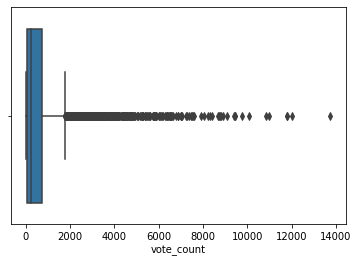

In [63]:
#Checking the dataset pattern for vote_count to get the minimum no of votes required for a movie to be qualified for analysis
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(credits_movies_merged['vote_count'])


In [64]:
# Calculate all the components based on the formula mentioned in the below link for weighted average
#Source: http://trailerpark.weebly.com/imdb-rating.html?source=post_page---------------------------
v=credits_movies_merged['vote_count'] # no of votes for the movie
R=credits_movies_merged['vote_average'] # average for the movie
C=credits_movies_merged['vote_average'].mean() # mean votes across the whole report
m=credits_movies_merged['vote_count'].quantile(0.75) # minimum no of votes.In our example,i will take 
                                                  #75% because as per the boxplot,max no of movies have votes 
                                                  #falling in 75 percentile

In [65]:
credits_movies_merged['weighted_average']=((R*v)+ (C*m))/(v+m)

In [66]:
#Dropping unnecesary columns
credits_movies_merged.drop(['cast','crew','budget','genres','original_title','production_companies','revenue','runtime','spoken_languages','tagline'],axis=1,inplace=True)

In [67]:
credits_movies_merged.sort_values(by='weighted_average',ascending=False).head()

,id,title_x,popularity,vote_average,vote_count,weighted_average
1881,278,The Shawshank Redemption,136.747729,8.5,8205,8.301547
3337,238,The Godfather,143.659698,8.4,5893,8.143459
662,550,Fight Club,146.757391,8.3,9413,8.139688
3232,680,Pulp Fiction,121.463076,8.3,8428,8.122458
65,155,The Dark Knight,187.322927,8.2,12002,8.078054


In [68]:
credits_movies_merged.sort_values(by='weighted_average',ascending=False).head(10)

,id,title_x,popularity,vote_average,vote_count,weighted_average
1881,278,The Shawshank Redemption,136.747729,8.5,8205,8.301547
3337,238,The Godfather,143.659698,8.4,5893,8.143459
662,550,Fight Club,146.757391,8.3,9413,8.139688
3232,680,Pulp Fiction,121.463076,8.3,8428,8.122458
65,155,The Dark Knight,187.322927,8.2,12002,8.078054
809,13,Forrest Gump,138.133331,8.2,7927,8.020698
96,27205,Inception,167.583710,8.1,13752,7.997869
1818,424,Schindler's List,104.469351,8.3,4329,7.978806
3865,244786,Whiplash,192.528841,8.3,4254,7.973979
95,157336,Interstellar,724.247784,8.1,10867,7.972478


In [69]:
weight_average=credits_movies_merged.sort_values(by='weighted_average',ascending=False)
weight_average.head()

,id,title_x,popularity,vote_average,vote_count,weighted_average
1881,278,The Shawshank Redemption,136.747729,8.5,8205,8.301547
3337,238,The Godfather,143.659698,8.4,5893,8.143459
662,550,Fight Club,146.757391,8.3,9413,8.139688
3232,680,Pulp Fiction,121.463076,8.3,8428,8.122458
65,155,The Dark Knight,187.322927,8.2,12002,8.078054


Text(0, 0.5, 'Movie Title')

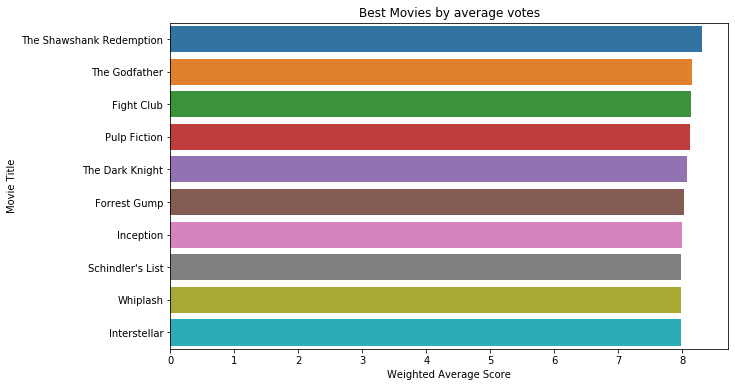

In [70]:
#Check the movie recommendation based on weighted average
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.barplot(x=weight_average['weighted_average'].head(10),y=weight_average['title_x'].head(10),data=weight_average)
plt.title('Best Movies by average votes')
plt.xlabel('Weighted Average Score')
plt.ylabel('Movie Title')

Text(0, 0.5, 'Movie Title')

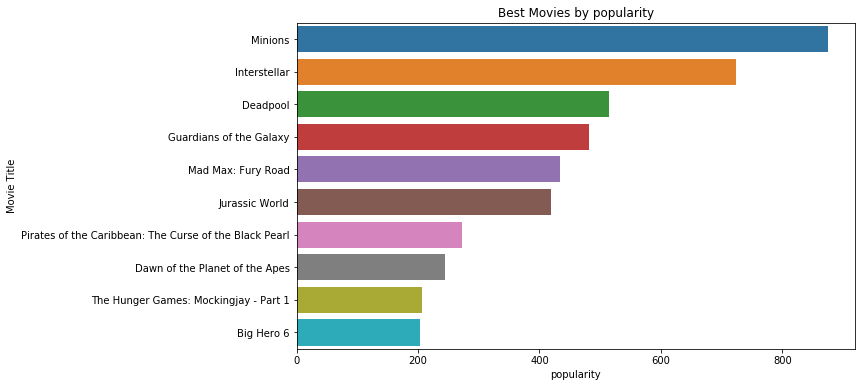

In [71]:
#Check the movie recommendation based on popularity
import matplotlib.pyplot as plt
popularity_based=credits_movies_merged.sort_values(by='popularity',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=popularity_based['popularity'].head(10),y=popularity_based['title_x'].head(10),data=popularity_based)
plt.title('Best Movies by popularity')
plt.xlabel('popularity')
plt.ylabel('Movie Title')

In [72]:
credits_movies_merged.sort_values(by='weighted_average',ascending=False).head(10)

,id,title_x,popularity,vote_average,vote_count,weighted_average
1881,278,The Shawshank Redemption,136.747729,8.5,8205,8.301547
3337,238,The Godfather,143.659698,8.4,5893,8.143459
662,550,Fight Club,146.757391,8.3,9413,8.139688
3232,680,Pulp Fiction,121.463076,8.3,8428,8.122458
65,155,The Dark Knight,187.322927,8.2,12002,8.078054
809,13,Forrest Gump,138.133331,8.2,7927,8.020698
96,27205,Inception,167.583710,8.1,13752,7.997869
1818,424,Schindler's List,104.469351,8.3,4329,7.978806
3865,244786,Whiplash,192.528841,8.3,4254,7.973979
95,157336,Interstellar,724.247784,8.1,10867,7.972478


In [73]:
#Standardize the weighted_average and popularity to come up with a new feature called score
from sklearn.preprocessing import MinMaxScaler
sd=MinMaxScaler()
credits_movies_normalized=pd.DataFrame(sd.fit_transform(credits_movies_merged[['weighted_average','popularity']]),
                                  columns=['weighted_average','popularity'])
credits_movies_merged[['normalized_weight_average','normalized_popularity']]= credits_movies_normalized
credits_movies_merged['score']=(credits_movies_merged['normalized_weight_average']*0.5)+(credits_movies_merged['normalized_popularity']*0.5)



Text(0, 0.5, 'Movie Title')

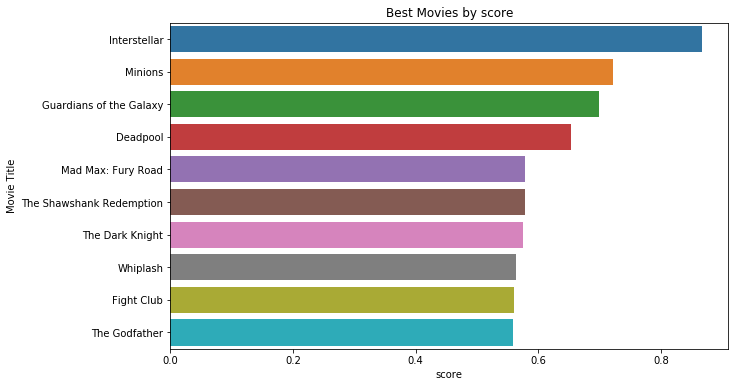

In [74]:
#Check the movie recommendation based on score (combination of weighted_average and popularity)
import matplotlib.pyplot as plt
score_based_recommend=credits_movies_merged.sort_values(by='score',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=score_based_recommend['score'].head(10),y=score_based_recommend['title_x'].head(10),data=score_based_recommend)
plt.title('Best Movies by score')
plt.xlabel('score')
plt.ylabel('Movie Title')
